In [1]:
%pylab widget
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastcat.fastcat as fc
from glob import glob

## First I'll look at the detector MTF

### I'll load all of the kernels 

In [3]:
spectra = glob('../fastcat/data/MV_spectra/*.txt')
phantoms = ['Catphan_404','Catphan_515','Catphan_MTF']
MV_detectors = glob('../fastcat/data/Detectors/*')

dispatcher={'Catphan_404':fc.Catphan_404,
            'Catphan_515':fc.Catphan_515,
            'Catphan_MTF':fc.Catphan_MTF}

In [4]:
s = fc.Spectrum()

<IPython.core.display.Javascript object>


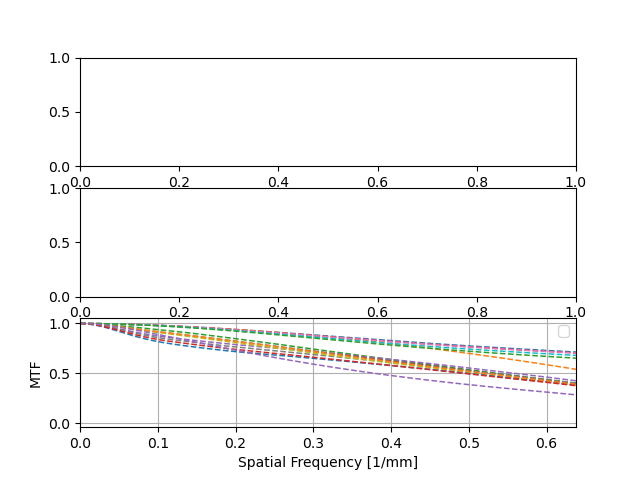

Calculation:  1 / 50
Calculation:  2 / 50
Calculation:  3 / 50
Calculation:  4 / 50
Calculation:  5 / 50
Calculation:  6 / 50
Calculation:  7 / 50
Calculation:  8 / 50
Calculation:  9 / 50
Calculation:  10 / 50
Calculation:  11 / 50
Calculation:  12 / 50
Calculation:  13 / 50
Calculation:  14 / 50
Calculation:  15 / 50
Calculation:  16 / 50
Calculation:  17 / 50
Calculation:  18 / 50
Calculation:  19 / 50
Calculation:  20 / 50
Calculation:  21 / 50
Calculation:  22 / 50
Calculation:  23 / 50
Calculation:  24 / 50
Calculation:  25 / 50
Calculation:  26 / 50
Calculation:  27 / 50
Calculation:  28 / 50
Calculation:  29 / 50
Calculation:  30 / 50
Calculation:  31 / 50
Calculation:  32 / 50
Calculation:  33 / 50
Calculation:  34 / 50
Calculation:  35 / 50
Calculation:  36 / 50
Calculation:  37 / 50
Calculation:  38 / 50
Calculation:  39 / 50
Calculation:  40 / 50
Calculation:  41 / 50
Calculation:  42 / 50
Calculation:  43 / 50
Calculation:  44 / 50
Calculation:  45 / 50
Calculation:  46 / 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
(19, 41, 41) 19


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 101, 101) 19
(17, 25, 25) 17


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19
(19, 101, 101) 19


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
(19, 41, 41) 19


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 101, 101) 19


No handles with labels found to put in legend.


(17, 25, 25) 17
(19, 41, 41) 19


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 101, 101) 19
(17, 25, 25) 17


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19


In [69]:
contrasts = []
mtfs = []
label = []

fig, axs = plt.subplots(3, 1)

spectra = [ 'kv',
 '../fastcat/data/MV_spectra/C_spectrum_25.txt',
 '../fastcat/data/MV_spectra/C_spectrum_6.txt',
 '../fastcat/data/MV_spectra/W_spectrum_25.txt',
 '../fastcat/data/MV_spectra/W_spectrum_6.txt']

MV_detectors = [
 '../fastcat/data/Detectors/CsI-150-micrometer',
 '../fastcat/data/Detectors/CWO-784-micrometer',
 '../fastcat/data/Detectors/CuGOS-784-micrometer']

phan_map = [
    'air',
    'G4_MUSCLE_SKELETAL_ICRP',
    'Spongiosa_Bone_ICRP',
    'G4_LUNG_MD_ICRP',
    'G4_BONE_COMPACT_ICRU',
    'G4_ADIPOSE_TISSUE_ICRP'
    ]

s0 = fc.calculate_spectrum(60, 12, 3, 50)
s0.attenuate(0.1,fc.get_mu(z=13))
s0.attenuate(0.015,fc.get_mu(z=29))


nviews = 360

for phan in phantoms[:1]:
    phantom = dispatcher[phan]()
    phantom.phan_map = phan_map
    for spectrum in spectra:
        for det in MV_detectors:
            
            if len(spectrum) > 4:
                s.load(spectrum.split('/')[-1].split('.')[0])
            else:
                s = s0
                
#             s0.attenuate(1,fc.get_mu(z=29))
            kernel = fc.Kernel(s, det.split('/')[-1].split('.')[0])
            kernel.get_plot_mtf_real(axs[2])
            mtfs.append([kernel.freq,kernel.mtf])
            angles = np.linspace(0,np.pi*2,nviews)        

#             phantom.return_projs(kernel,s,angles,det_on=True,mgy = 0.0)#20/nviews)
#             phantom.reconstruct('FDK')
# #             phantom.reconstruct('CGLS')
#             contrasts.append(phantom.analyse_515(phantom.img[5],axs))
#             label.append(spectrum.split('/')[-1].split('.')[0] + det.split('/')[-1].split('.')[0])
#             break
#         break
#     break

In [9]:
contrasts = []
mtfs = []
label = []

fig, axs = plt.subplots(3, 1)

spectra = [ 'kv',
 '../fastcat/data/MV_spectra/C_spectrum_25.txt']

MV_detectors = [
 '../../fastcat/data/Detectors/CsI-150-micrometer']

phan_map = [
    'air',
    'G4_MUSCLE_SKELETAL_ICRP',
    'Spongiosa_Bone_ICRP',
    'G4_LUNG_MD_ICRP',
    'G4_BONE_COMPACT_ICRU',
    'G4_ADIPOSE_TISSUE_ICRP'
    ]

s0 = fc.calculate_spectrum(120, 12, 3, 50)
# s0.attenuate(0.2,fc.get_mu(z=13))

nviews = 480

for phan in phantoms[2:3]:
    phantom = dispatcher[phan]()
#     phantom.phan_map = phan_map
    for spectrum in spectra:
        for det in MV_detectors:
            
            if len(spectrum) > 4:
                s.load(spectrum.split('/')[-1].split('.')[0])
            else:
                s = s0
#             s0.attenuate(1,fc.get_mu(z=29))
            kernel = fc.Kernel(s, det.split('/')[-1].split('.')[0])
            kernel.get_plot_mtf_real(axs[2])
            mtfs.append([kernel.freq,kernel.mtf])
#             angles = np.linspace(0,np.pi*2,nviews)        

#             phantom.return_projs(kernel,s,angles,det_on=True,mgy = 0.0)#20/nviews)
#             phantom.reconstruct('FDK',filt='ram_lak')
#             phantom.reconstruct('CGLS')
#             contrasts.append(phantom.analyse_515(phantom.img[5],axs))
            label.append(spectrum.split('/')[-1].split('.')[0] + det.split('/')[-1].split('.')[0])
#             break
#         break
#     break

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculation:  1 / 50
Calculation:  2 / 50
Calculation:  3 / 50
Calculation:  4 / 50
Calculation:  5 / 50
Calculation:  6 / 50
Calculation:  7 / 50
Calculation:  8 / 50
Calculation:  9 / 50
Calculation:  10 / 50
Calculation:  11 / 50
Calculation:  12 / 50
Calculation:  13 / 50
Calculation:  14 / 50
Calculation:  15 / 50
Calculation:  16 / 50
Calculation:  17 / 50
Calculation:  18 / 50
Calculation:  19 / 50
Calculation:  20 / 50
Calculation:  21 / 50
Calculation:  22 / 50
Calculation:  23 / 50
Calculation:  24 / 50
Calculation:  25 / 50
Calculation:  26 / 50
Calculation:  27 / 50
Calculation:  28 / 50
Calculation:  29 / 50
Calculation:  30 / 50
Calculation:  31 / 50
Calculation:  32 / 50
Calculation:  33 / 50
Calculation:  34 / 50
Calculation:  35 / 50
Calculation:  36 / 50
Calculation:  37 / 50
Calculation:  38 / 50
Calculation:  39 / 50
Calculation:  40 / 50
Calculation:  41 / 50
Calculation:  42 / 50
Calculation:  43 / 50
Calculation:  44 / 50
Calculation:  45 / 50
Calculation:  46 / 

No handles with labels found to put in legend.


(19, 101, 101) 19


No handles with labels found to put in legend.


(19, 101, 101) 19


<IPython.core.display.Javascript object>


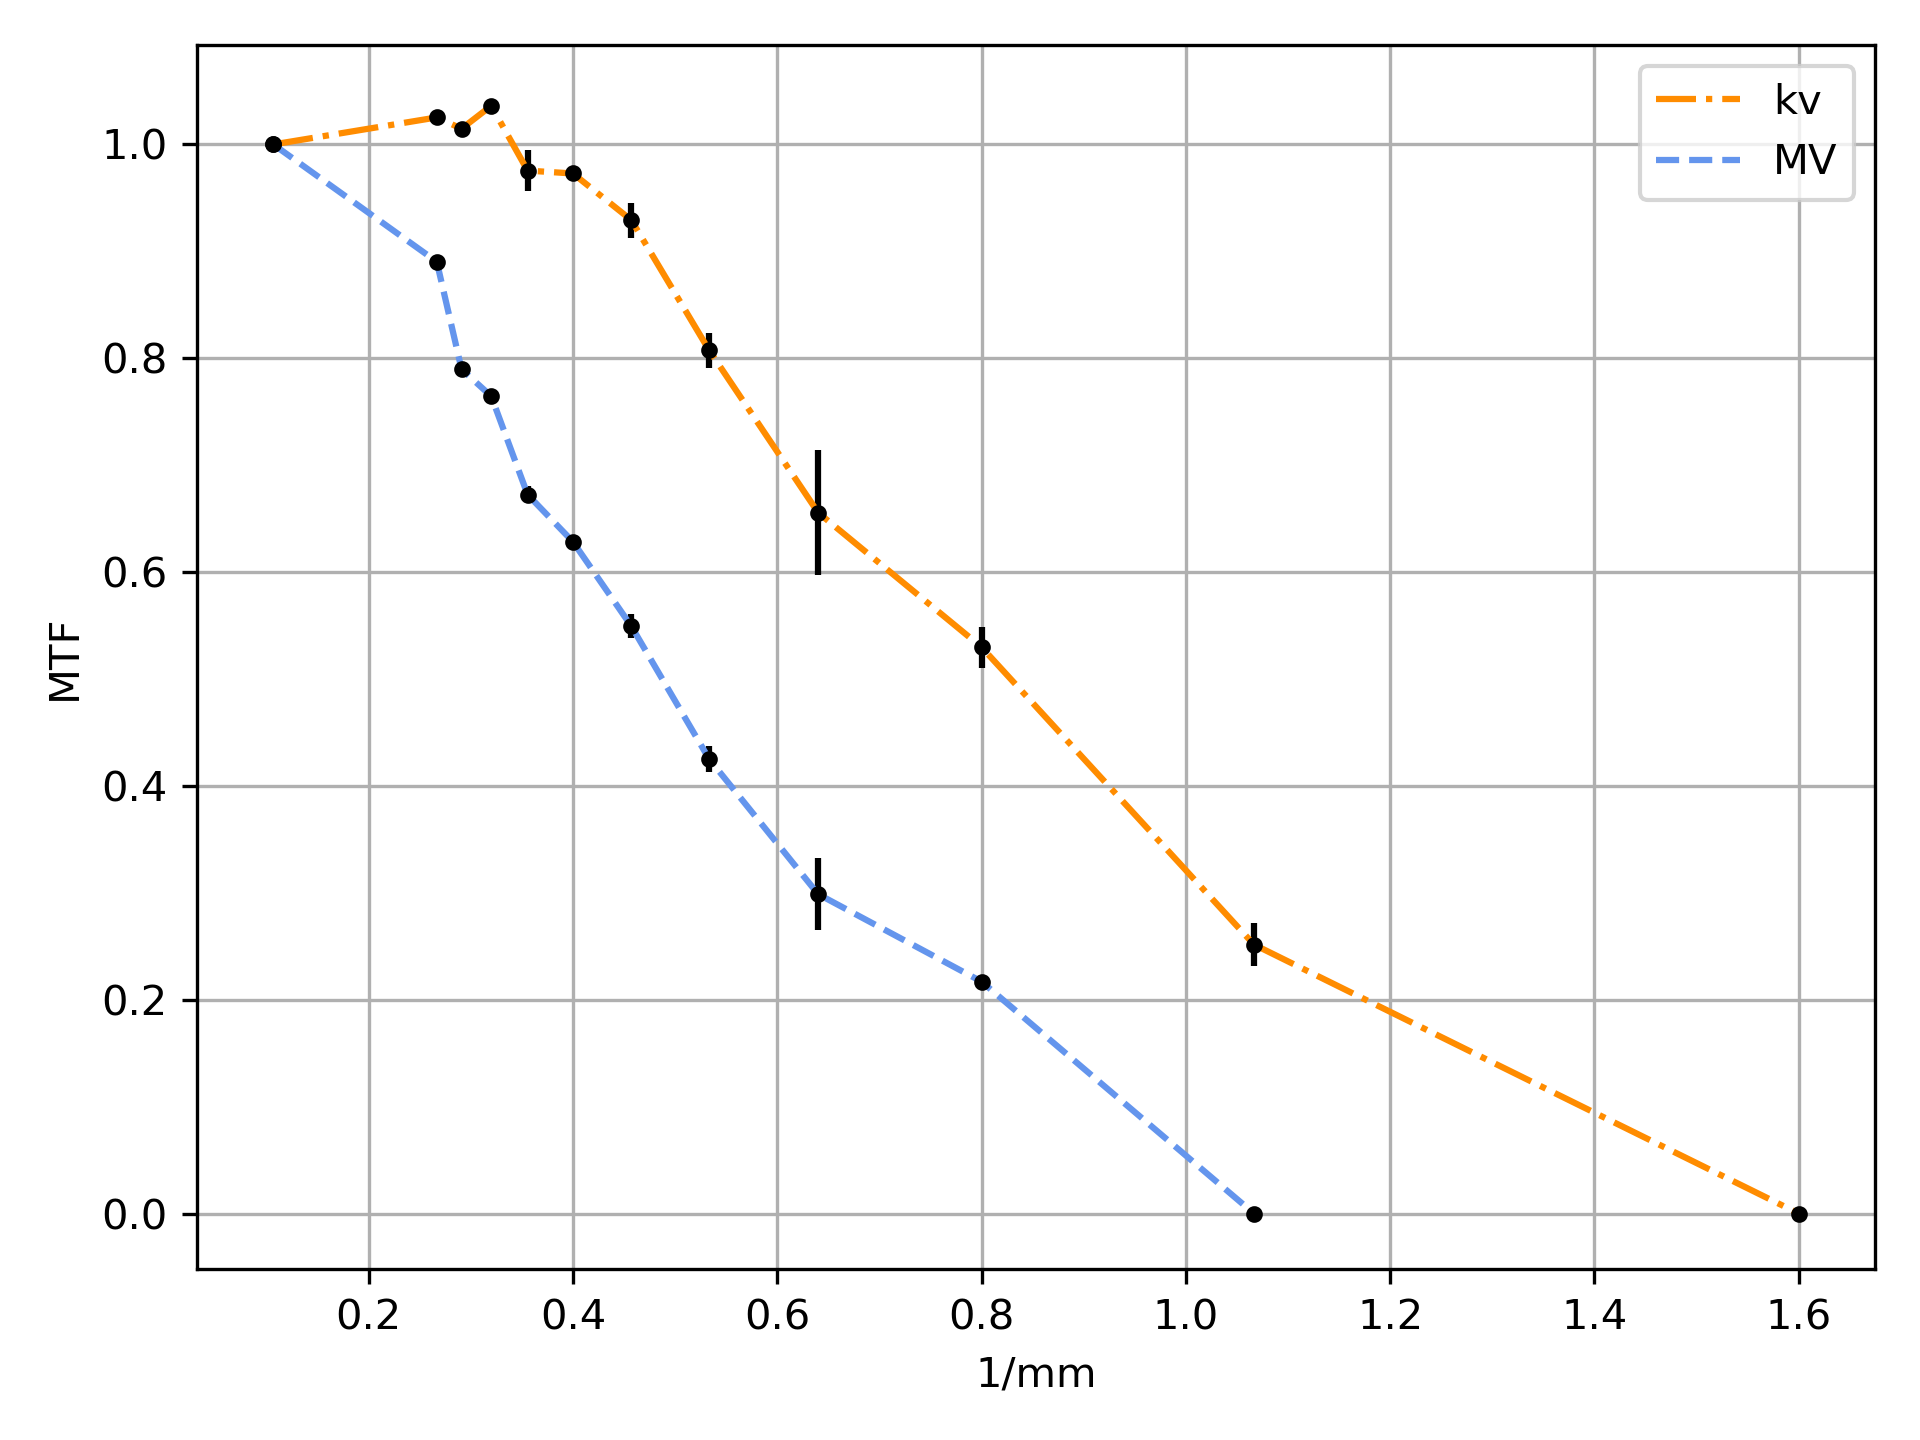

In [44]:
plt.figure(dpi=300)

pitch = 0.015625

lpmm = [1/(2*ii*pitch) for ii in range(12,0,-1)]

lpmm.insert(0,1/(2*30*pitch))

lpmm = np.array(lpmm)/10

signal, standev = contrasts[0]

plt.plot(lpmm[:len(signal)],signal,'-.',color='darkorange')

signal, standev = contrasts[1]

plt.plot(lpmm[:len(signal)],signal,'--',color='cornflowerblue')

signal, standev = contrasts[0]


plt.errorbar(lpmm[:len(signal)],signal,yerr=standev,fmt='k.')
plt.xlabel('lp/cm')
plt.ylabel('MTF')

# plt.plot(mtfs[0][0],mtfs[0][1])
# plt.plot(mtfs[1][0],mtfs[1][1])


signal, standev = contrasts[1]

plt.errorbar(lpmm[:len(signal)],signal,yerr=standev,fmt='k.')

plt.xlabel('1/mm')
plt.ylabel('MTF')
plt.grid('on')
plt.legend(['kv','MV'])
plt.tight_layout()
plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/MTF_phantom.pdf')

<IPython.core.display.Javascript object>


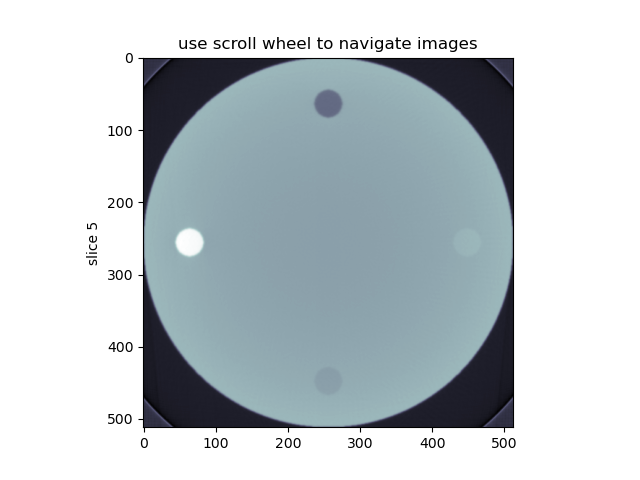

In [90]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.img.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [91]:
np.save('cnr_nonoise_404',contrasts)
np.save('mtfs_nonoise_404',mtfs)
np.save('labels_404',label)

In [4]:
contrasts = np.load('cnr_new_noisy_404.npy',allow_pickle=True)
mtfs = np.load('mtfs_nonoise_404.npy')
label = np.load('labels_404.npy')

In [5]:
from matplotlib import cm

In [7]:
mpl.rcParams['font.family'] = 'Times New Roman'

<IPython.core.display.Javascript object>


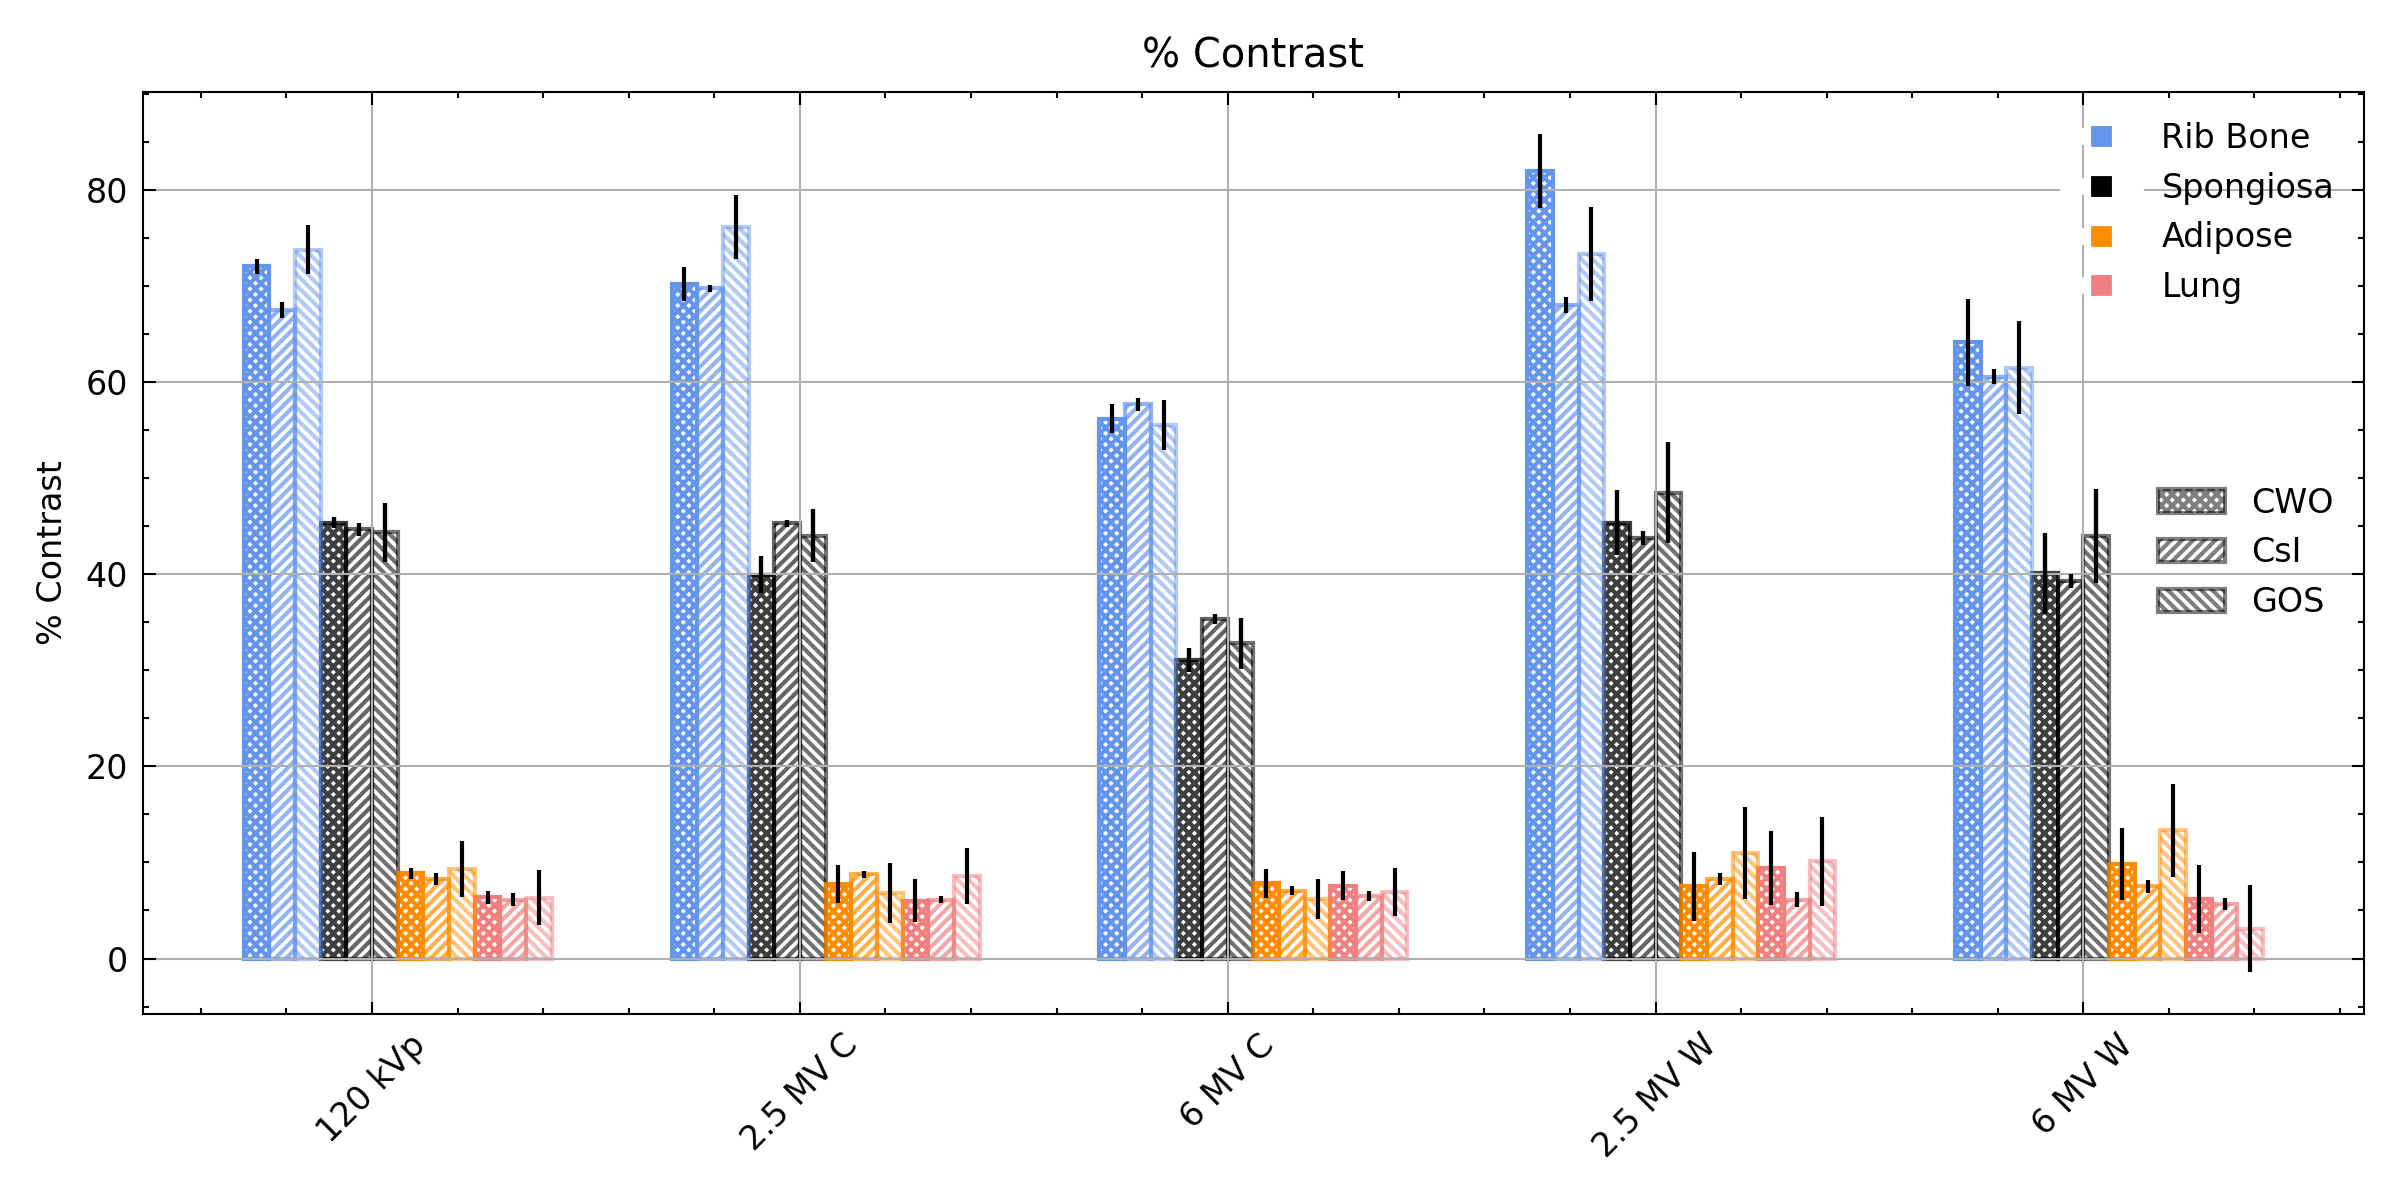

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


In [8]:
# inds_i_want = [0,6,12,18,21,24]
inds_i_want = [0,3,2,1]

cc = np.array([np.array(contrasts[ii][1])[inds_i_want] for ii in range(len(contrasts))])
ee = np.array([np.array(contrasts[ii][2])[inds_i_want] for ii in range(len(contrasts))])
# ll = np.array([np.array(label[ii]) for ii in range(len(contrasts))])

plt.figure(figsize=[8,4],dpi=300)

alph = 0.5
hat = 'xxxxxxxxx'
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06
# alph = 0.7
hat = '/////////'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06*2
# alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)

first_legend = plt.legend(['CWO','CsI','GOS'],loc='center right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

alph = 1
hat = 'xxxxxxxxx'

plt.title('% Contrast')
plt.bar(np.arange(len(label[::3]))-0.09*3,cc.flatten()[2::4][::3], yerr = ee.flatten()[2::4][::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3,cc.flatten()[1::4][::3], yerr = ee.flatten()[1::4][::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3,cc.flatten()[::4][::3], yerr = ee.flatten()[::4][::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06
alph = 0.7
hat = '/////////'

plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][1::3], yerr = ee.flatten()[2::4][1::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][1::3], yerr = ee.flatten()[1::4][1::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][1::3], yerr = ee.flatten()[::4][1::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06*2
alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][2::3], yerr = ee.flatten()[2::4][2::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph - 0.4,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][2::3], yerr = ee.flatten()[1::4][2::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][2::3], yerr = ee.flatten()[::4][2::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

plt.ylabel('% Contrast')
# plt.plot(cc.flatten()[4::6],'*',alpha=alph,hatch=hat,fill=False)
# plt.plot(cc.flatten()[5::6],'*',alpha=alph,hatch=hat,fill=False)
labs = ['120 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W']
plt.xticks(range(len(label[::3])),labels=labs,rotation=45)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0],marker='s',color = 'w', markerfacecolor='cornflowerblue', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='k', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='darkorange', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='lightcoral', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['Rib Bone', 'Spongiosa', 'Adipose','Lung'])
plt.grid()
# Create a legend for the first line.
# first_legend = plt.legend(handles=[line1])

# Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(first_legend)


plt.tight_layout()
# plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/Contrast.pdf')

<IPython.core.display.Javascript object>


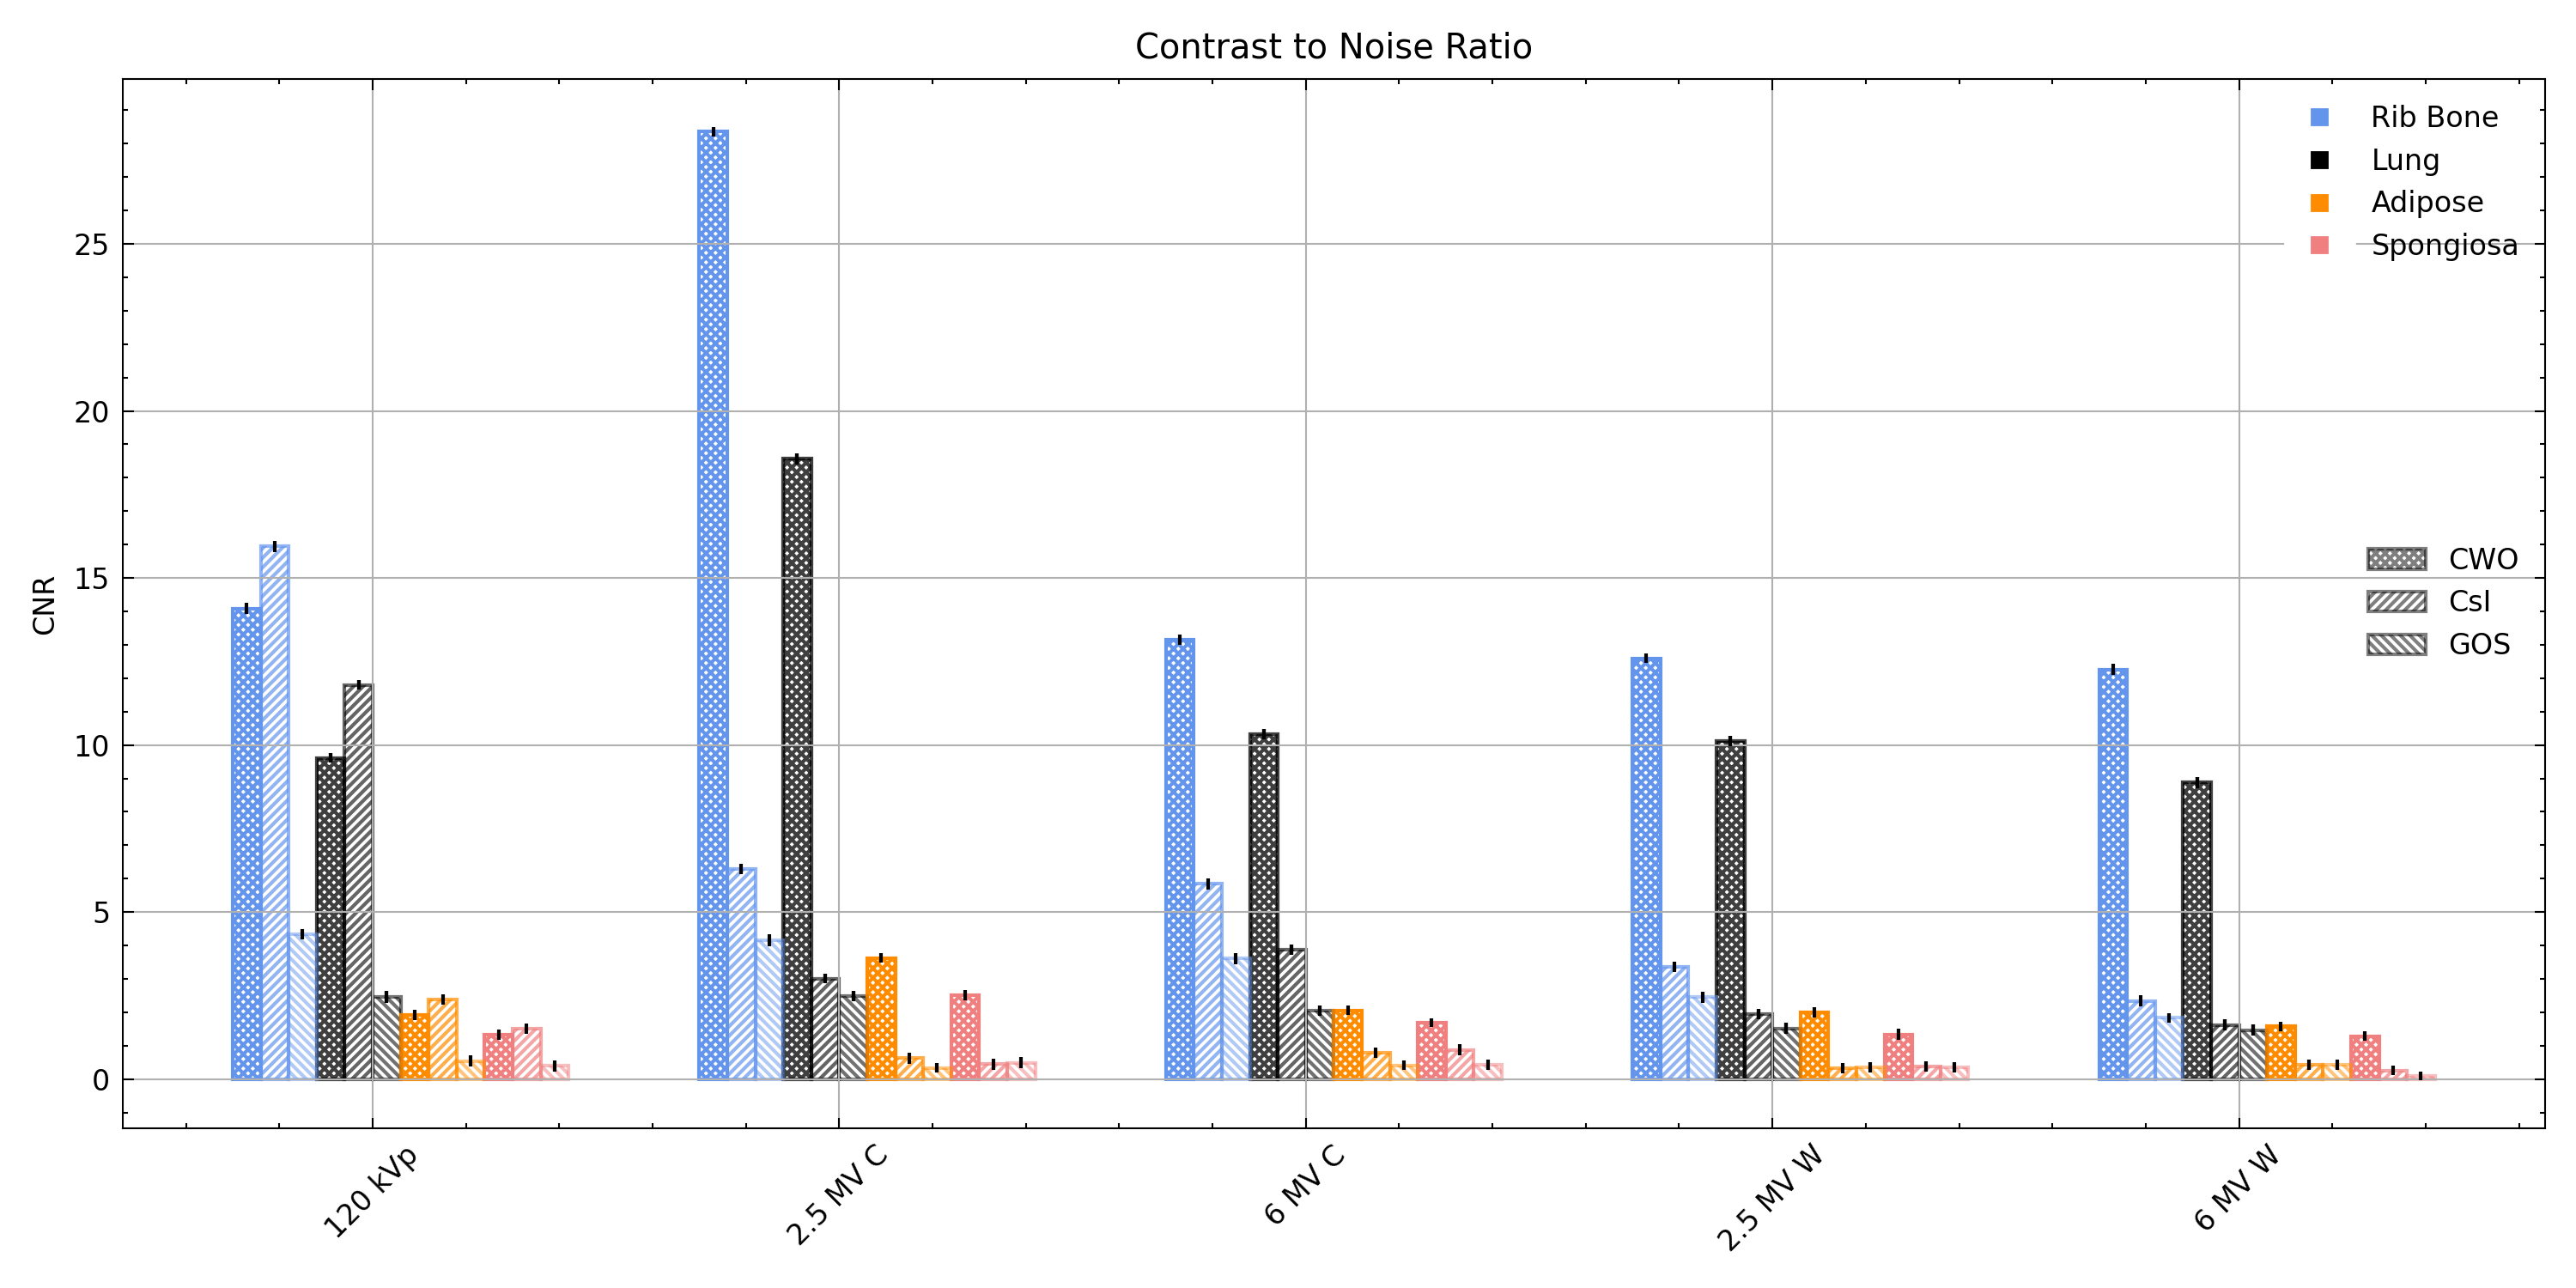

In [24]:
# inds_i_want = [0,6,12,18,21,24]
inds_i_want = [0,3,2,1]

cc = np.array([np.array(contrasts[ii][3])[inds_i_want] for ii in range(len(contrasts))])
ee = np.array([np.array(contrasts[ii][4])[inds_i_want] for ii in range(len(contrasts))])
# ll = np.array([np.array(label[ii]) for ii in range(len(contrasts))])

plt.figure(figsize=[10,5],dpi=300)

alph = 0.5
hat = 'xxxxxxxxx'
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06
# alph = 0.7
hat = '/////////'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06*2
# alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)

first_legend = plt.legend(['CWO','CsI','GOS'],loc='center right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

alph = 1
hat = 'xxxxxxxxx'

plt.title('Contrast to Noise Ratio')

plt.bar(np.arange(len(label[::3]))-0.09*3,cc.flatten()[2::4][1::3], yerr = ee.flatten()[2::4][1::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3,cc.flatten()[1::4][1::3], yerr = ee.flatten()[1::4][1::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3,cc.flatten()[::4][1::3], yerr = ee.flatten()[::4][1::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06
alph = 0.7
hat = '/////////'

plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][::3], yerr = ee.flatten()[2::4][::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][::3], yerr = ee.flatten()[1::4][::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][::3], yerr = ee.flatten()[::4][::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06*2
alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][2::3], yerr = ee.flatten()[2::4][2::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph - 0.4,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][2::3], yerr = ee.flatten()[1::4][2::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][2::3], yerr = ee.flatten()[::4][2::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

plt.ylabel('CNR')
# plt.plot(cc.flatten()[4::6],'*',alpha=alph,hatch=hat,fill=False)
# plt.plot(cc.flatten()[5::6],'*',alpha=alph,hatch=hat,fill=False)
labs = ['120 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W']
plt.xticks(range(len(label[::3])),labels=labs,rotation=45)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0],marker='s',color = 'w', markerfacecolor='cornflowerblue', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='k', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='darkorange', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='lightcoral', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['Rib Bone','Lung','Adipose','Spongiosa'])
plt.grid('on')
# Create a legend for the first line.
# first_legend = plt.legend(handles=[line1])

# Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(first_legend)


plt.tight_layout()
# plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/CNR.pdf')

In [24]:
label

['kvCsI-784-micrometer',
 'kvCWO-784-micrometer',
 'kvCuGOS-784-micrometer',
 'C_spectrum_25CsI-784-micrometer',
 'C_spectrum_25CWO-784-micrometer',
 'C_spectrum_25CuGOS-784-micrometer',
 'C_spectrum_6CsI-784-micrometer',
 'C_spectrum_6CWO-784-micrometer',
 'C_spectrum_6CuGOS-784-micrometer',
 'W_spectrum_25CsI-784-micrometer',
 'W_spectrum_25CWO-784-micrometer',
 'W_spectrum_25CuGOS-784-micrometer',
 'W_spectrum_6CsI-784-micrometer',
 'W_spectrum_6CWO-784-micrometer',
 'W_spectrum_6CuGOS-784-micrometer']

<IPython.core.display.Javascript object>


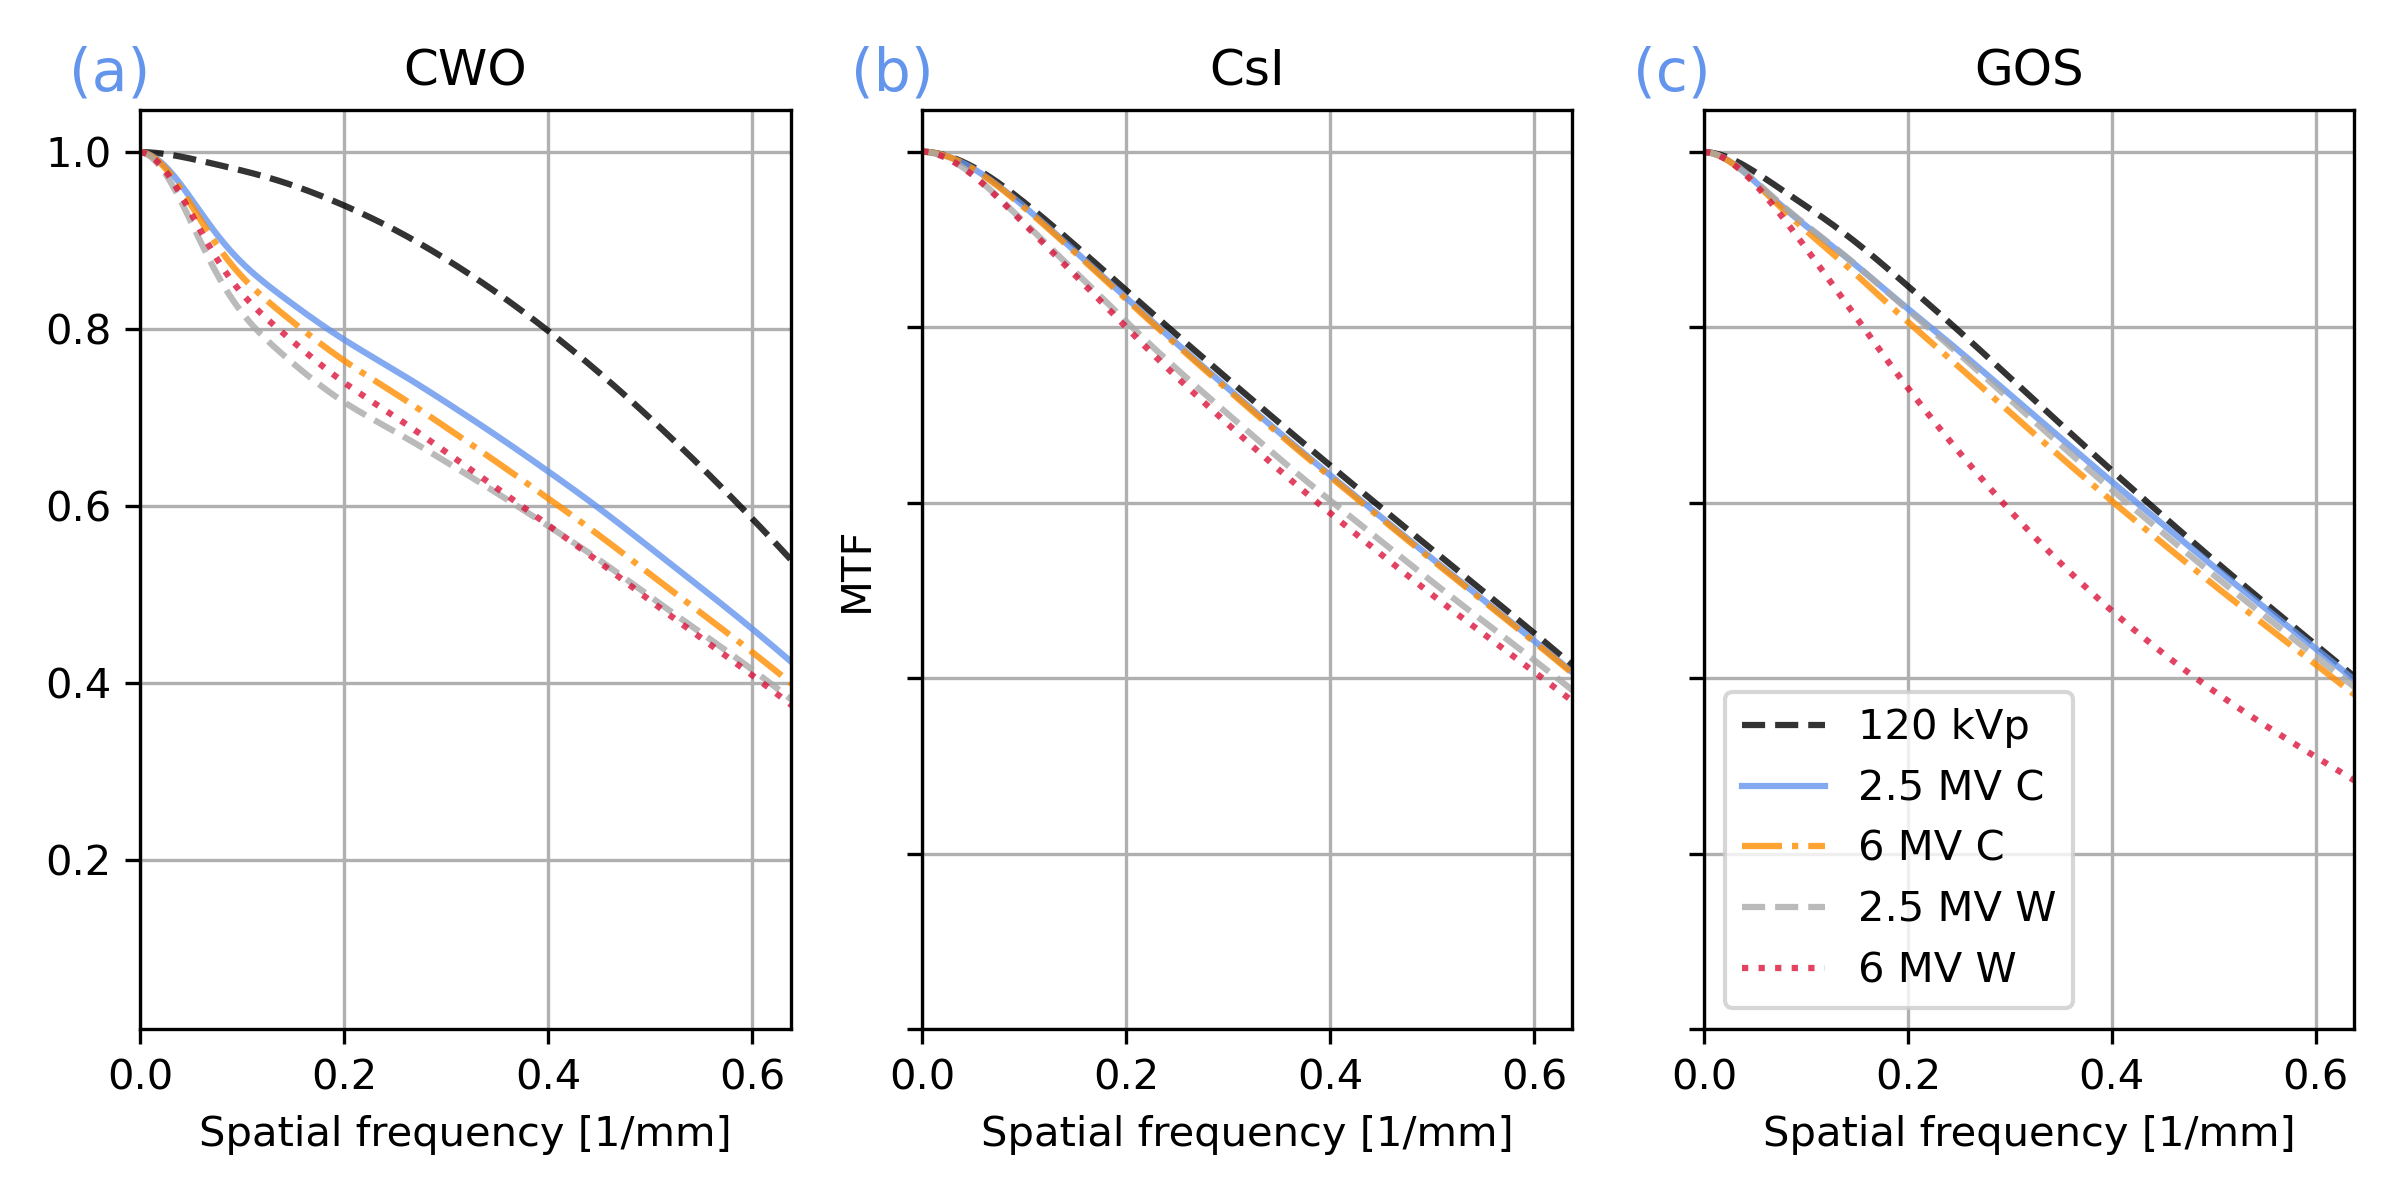

In [94]:
plt.figure(figsize=[8,4],dpi=300)
plt.subplot(132)
# plt.ylim([0.2,1.05])

xx = -0.07
yy = 1.07

speks = ['--','-','-.','--',':']
colors = ['k','cornflowerblue','darkorange','darkgrey','crimson']

plt.text(xx,yy,'(b)',color='cornflowerblue',fontsize=14)
for jj, ii in enumerate([0,3,6,9,12]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
#     plt.plot(mtfs[ii][0][::5],mtfs[ii][1][::5],'.',color=colors[jj],markersize=1.5,alpha=0.8)
plt.title('CsI')
plt.ylabel('MTF')
plt.yticks(ticks=[0.0, 0.2,0.4,0.6,0.8,1],labels=[])
plt.xlabel('Spatial frequency [1/mm]')
plt.grid('on')
    
plt.xlim([-0,1/(2*0.784)])

plt.subplot(131)
plt.text(xx,yy,'(a)',color='cornflowerblue',fontsize=14)
# plt.ylim([0.2,1.05])

for jj, ii in enumerate([1,4,7,10,13]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)

plt.title('CWO')
plt.xlabel('Spatial frequency [1/mm]')
plt.grid('on')
plt.xlim([-0,1/(2*0.784)])

plt.subplot(133)
# plt.ylim([0.2,1.05])

plt.text(xx,yy,'(c)',color='cornflowerblue',fontsize=14)


for jj, ii in enumerate([2,5,8,11,14]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
plt.title('GOS')
plt.legend(['120 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W'])
plt.xlabel('Spatial frequency [1/mm]')
plt.yticks(ticks=[0.0, 0.2,0.4,0.6,0.8,1],labels=[])
plt.grid('on')
plt.xlim([-0,1/(2*0.784)])
plt.tight_layout()

plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/MTF_2.pdf')

In [11]:
plt.figure(figsize=[4,4])
plt.subplot(111)
# plt.ylim([0.2,1.05])

xx = -0.07
yy = 1.07

speks = ['--','-','-.','--',':']
colors = ['cornflowerblue','darkorange','darkgrey','crimson']

# plt.text(xx,yy,'(b)',color='cornflowerblue',fontsize=14)
for jj, ii in enumerate([0]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8,label='fastCAT')
#     plt.plot(mtfs[ii][0][::5],mtfs[ii][1][::5],'.',color=colors[jj],markersize=1.5,alpha=0.8)
plt.title('CsI Validation 60 kVp 0.150 mm pixel')
plt.ylabel('MTF')
# plt.yticks(ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[])
plt.xlabel('Spatial frequency [1/mm]')
plt.grid('on')

dats2 = np.array([0.026052635192449713, 0.994492130588933,
0.15568447352428327, 0.9615179753726617,
0.2678324444565603, 0.9144254069133888,
0.39290299807856766, 0.8602696668771996,
0.4920586031058045, 0.8137678767748149,
0.6258139950696089, 0.7613757489073764,
0.7293278790894058, 0.7172267633484641,
0.8673971425451179, 0.6630686443390259,
1.0228360826844245, 0.6124377496670886,
1.2170998662509018, 0.5459129347171532,
1.385524828366584, 0.49410286230468914,
1.55832710126082, 0.4464107925866142,
1.6533781844420798, 0.421092173286313,
1.9127053003923926, 0.3610278566901599,
2.2542687636215324, 0.2927108818924834,
2.5224075964869335, 0.24617816513785862,
2.7689834158214595, 0.20906380347687215,
3.037261815117482, 0.1754758731623035,
3.2926176317237736, 0.1489511144246512,
3.608602374577365, 0.11947325689364152,
3.8727064688120985, 0.10059610416112896,
4.197452177151463, 0.07994265140253631,
4.522242292991479, 0.06340799432941657,
4.8557426228879494, 0.05099054695960281,
5.27588198655646, 0.03679204161721117,
])

# plt.plot(np.array(dats[::2]),dats[1::2])
np.save('csi_file',mtfs[0])
# plt.plot(np.array(dats3[::2]),dats3[1::2]/100)
plt.plot(np.array(dats2[::2]),dats2[1::2],'k:',linewidth= 1.1,markersize=3,label='Vedantham et al.')
plt.plot(np.array(dats2[::2]),dats2[1::2],'k.',linewidth= 1.1,markersize=4)
plt.legend()
plt.tight_layout()
plt.savefig('CsI_validation',dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
inds_i_want = [0,6,12,18,21,24]
shorts = ['Lung','Compact Bone','Cortical Bone','Adipose','Brain','B-100']

contrasts_only = [contrasts[ii][1] for ii in range(len(contrasts))]

contrast_ar = np.array(contrasts_only)[:,inds_i_want]

dets_i_want = [0,3,6]

contrasts_to_plot = contrast_ar[::3,0].reshape([3,6])

lx, ly = contrasts_to_plot.shape

_x = np.arange(lx)
_y = np.arange(ly)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 0.9

specs = [spectra[kk].split('/')[-1].split('_')[0] + ' ' + spectra[kk].split('/')[-1].split('_')[2].split('.')[0] for kk in range(len(spectra))]
detz = [MV_detectors[kk].split('/')[-1].split('-')[0] for kk in range(len(MV_detectors))]

max_height = np.max(contrast_ar[::3,:])   # get range of colorbars so we can normalize
min_height = np.min(0)

fig = plt.figure(figsize=(10, 10))
    
for jj in range(len(inds_i_want)):
    
    contrasts_to_plot = contrast_ar[::3,jj].reshape([3,6]).flatten()#.reshape([len(spectra),int(len(contrasts)/len(spectra))])

    cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in contrasts_to_plot] 

    ax1 = fig.add_subplot(2,3,jj+1, projection='3d')
    ax1.bar3d(x,y, bottom, width, depth, contrasts_to_plot,color=rgba, zsort='average', shade=True)
    ax1.set_title(shorts[jj])
    ax1.set_yticks(range(len(spectra)))
    ax1.set_yticklabels(sorted(specs))
    ax1.set_xticks(range(len(detz[::3])))
    ax1.set_xticklabels(sorted(detz)[::3])
    plt.tight_layout()
    
#     break

ValueError: cannot reshape array of size 5 into shape (3,6)

In [88]:
np.array(label)[:,1].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt'],
       ['../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al

In [108]:
detz

['CuGOS-392-micrometer',
 'CWO-784-micrometer',
 'CuGOS-784-micrometer',
 'CsI-392-micrometer',
 'CuGOS-336-micrometer',
 'CWO-392-micrometer',
 'CsI-784-micrometer',
 'CWO-261-micrometer',
 'CsI-336-micrometer']

In [89]:
np.array(label)[:,2].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/CuGOS-784-micrometer'],
       ['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/Cu

In [91]:
contrast_ar[:,0].reshape([len(spectra),int(len(contrasts)/len(spectra))]).flatten()

array([10.94017538, 10.91813642, 10.94120732, 12.33236147, 12.30379796,
       12.30942803, 10.00898376, 10.00442507,  9.98202601, 11.30305439,
       11.2847624 , 11.26505964, 12.20998428, 12.16116432, 12.19630993,
       10.48481183, 10.47977956, 10.45809289, 12.89002102, 12.90404621,
       12.90185399, 14.61528942, 14.6249419 , 14.67340515, 10.11429075,
       10.09519276, 10.09851538, 12.41890821, 12.42877168, 12.46004897,
       13.46521681, 13.49752204, 13.46466291, 10.55510461, 10.56961973,
       10.55533228,  6.9022765 ,  6.91422433,  6.90450925,  8.19008695,
        8.18565598,  8.19404018,  7.91018029,  7.93289181,  7.92613491,
        7.14180457,  7.1456152 ,  7.13077258,  8.48668059,  8.509874  ,
        8.47786037,  8.07174783,  8.08153531,  8.06178995])

<IPython.core.display.Javascript object>


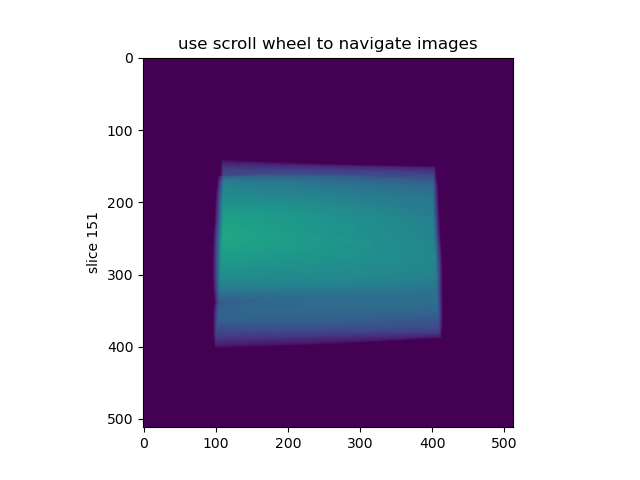

In [10]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.proj.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()